In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def import_excel_old(path):
    df = pd.read_excel(path, skiprows=3)
    df = df.dropna(axis=0, how='any')
    df = df.drop(index = [1,3])
    return df

def import_excel(path):
    df = pd.read_excel(path)
    df = df.dropna(axis=0, how='any')
    return df


def print_desc_stats(np_arr):
    mean = np.sum(np_arr)/len(np_arr)
    var = np.sum((np_arr - mean) ** 2) / len(np_arr)
    skew = np.sum((np_arr - mean) ** 3) / len(np_arr) / (var ** 1.5) 
    kurtosis = np.sum((np_arr - mean) ** 4) / len(np_arr) / (var ** 2) - 3
    print(f'Мат. ожидание - {mean}')
    print(f'Дисперсия - {var}')
    print(f'Коэффицинт ассиметрии - {skew}')
    print(f'Эксцесс - {kurtosis}')  
    print(f'Квантиль 0,05 - {np.quantile(np_arr, 0.05)}') 
    print(f'Квантиль 0,95 - {np.quantile(np_arr, 0.95)}') 
    print(f'2,5%-ная точка - {np.quantile(np_arr, 0.975)}') 
    
def pl(npArr):
    maxInd = np.argmax(npArr)
    
    step = 4 * np.std(npArr) / len(npArr)
    a = (-2 * np.std(npArr)) * 2 * (maxInd)/ len(npArr) + np.mean(npArr)
    b = (2 * np.std(npArr)) * 2 * (len(npArr) - maxInd)/ len(npArr)  + np.mean(npArr)
    
    x = np.arange(a, b, step)
    plt.bar(x, npArr)
    
    stepNorm = 6 * np.std(npArr) / len(npArr)/100
    aNorm = (-3 * np.std(npArr)) * 2 * (maxInd)/ len(npArr) + np.mean(npArr)
    bNorm = (3 * np.std(npArr)) * 2 * (len(npArr) - maxInd)/ len(npArr)  + np.mean(npArr)
    
    xNorm = np.arange(aNorm, bNorm, stepNorm)
    k = np.max(npArr) / np.max(norm.pdf(xNorm,np.mean(npArr), np.std(npArr)))
    
    plt.plot(xNorm, norm.pdf(xNorm,np.mean(npArr), np.std(npArr))*k, color='m')

    plt.show()


# Курс «Теория вероятностей и статистика в Машинном Обучении»
## Лабораторная работа №2: Случайные величины. Нормальный закон распределения. Моменты и критические границы случайной величины
1.	Найти на сайте РосСтат  https://rosstat.gov.ru/statistic   непрерывное распределение случайной величины, которое было бы близко к нормальному.
Построить графики распределения.


Данные были взяты из выборочного наблюдения рациона питания населения за 2018 год

### Частота потребление энергетических напитков, содержащих кофеин по возрастным группам

In [2]:
df1 = import_excel('datasets/4.8.xlsx')
df1

Возраст  ежедневно или несколько раз в неделю  несколько раз в месяц  \
0        14-17                              1.774867               4.437491   
1        18-19                              4.398153               9.306122   
2    20 – 24                                4.718262               9.417549   
3    25 – 29                                3.900301               6.412779   
4     30 – 34                               2.979116               6.087046   
5      35 – 39                              2.543358               4.529998   
6      40 - 44                              2.464631               3.953729   
7     45 – 49                               2.575454               3.353419   
8      50 - 54                              2.014933               2.580631   
9     55 – 59                               1.495316               2.082638   
10    60 – 64                               1.317176               1.248351   
11     65 - 69                              1.243794               1.492027   
12   70 – 74                                0.803887               0.809496   
13    75 – 79                               1.013207               1.041039   
14  80 и более                              0.647003               0.347987   

    один раз в месяц или реже  практически не употребляют  
0                    8.450359                   85.337283  
1                   14.675336                   71.620388  
2                   14.892014                   70.972174  
3                   13.702457                   75.984464  
4                   10.849586                   80.084252  
5                    9.570002                   83.356642  
6                    8.172632                   85.409008  
7                    6.087263                   87.983864  
8                    3.973851                   91.430586  
9                    3.039916                   93.382130  
10                   2.402297                   95.032175  
11                   1.752126                   95.512053  
12                   1.580921                   96.805696  
13                   1.595229                   96.350525  
14                   1.149313                   97.855697

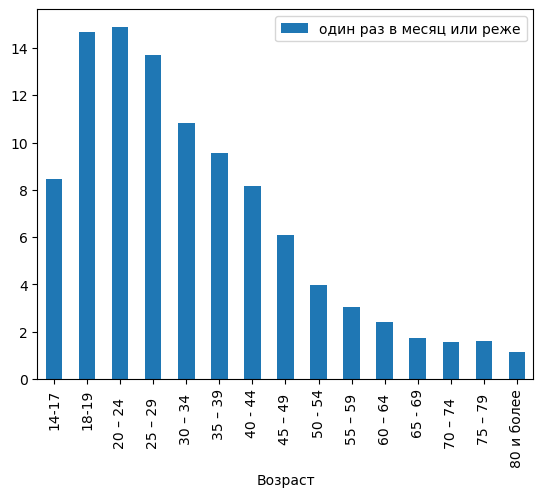

In [3]:
df1.plot(x=0, y=3, kind = 'bar')
plt.show()

2.	Посчитать в распределение близком к нормальному  1 л.р. и найденном непрерывном распределении:
- мат.ожидание (*)
- 2 (дисперсию) (**), 3 (асимметрию), 4 (эксцесс) моменты 
- квантили уровня 0,05 и 0,95; 2,5%-ную точку  для найденной случайной величины. 

### Частота потребление энергетических напитков, содержащих кофеин по возрастным группам

In [4]:
print_desc_stats(df1['один раз в месяц или реже'].to_numpy())

Мат. ожидание - 6.792886804363222
Дисперсия - 23.835832095883855
Коэффицинт ассиметрии - 0.3988300010570753
Эксцесс - -1.2932435195771799
Квантиль 0,05 - 1.451438632658965
Квантиль 0,95 - 14.740339594616
2,5%-ная точка - 14.816176939224201


### Курите ли вы в настоящее время

In [5]:
df_smoke = import_excel_old('./datasets/22_2022_СЗН.xlsx')
df_smoke

Возраст  Да, ежедневно   Не каждый день (периодически)   \
2        15-19 лет        3.183661                        1.576591   
4        20-24 лет       10.730690                        3.624435   
5        25-29 лет       15.407079                        4.558647   
6        30-34 лет       18.662320                        4.166731   
7        35-39 лет       21.807080                        4.433298   
8        40-44 лет       25.085814                        4.066897   
9        45-49 лет       25.471021                        3.795270   
10       50-54 лет       22.118263                        3.541141   
11       55-59 лет       20.580492                        2.237264   
12       60-64 лет       16.192445                        1.624702   
13       65-69 лет       12.445445                        1.644520   
14       70-74 лет        8.310893                        1.073106   
15       75-79 лет        4.996844                        0.980794   
16  80 лет и более        2.002175                        0.251287   

    Нет, совсем не курю и не курил ранее   Бросил курить  Отказ от ответа   
2                               93.250286       1.211762          0.777701  
4                               80.256460       4.710394          0.678021  
5                               70.855764       8.577288          0.601222  
6                               66.647848       9.895205          0.627896  
7                               61.672864      11.329623          0.757135  
8                               58.860938      11.063912          0.922439  
9                               58.491302      11.541034          0.701374  
10                              61.836534      11.936647          0.567415  
11                              64.988412      11.890358          0.303474  
12                              67.597857      14.236651          0.348346  
13                              70.726898      14.839335          0.343802  
14                              74.324428      16.078732          0.212841  
15                              77.879882      15.789110          0.353370  
16                              86.331429      10.839490          0.575619

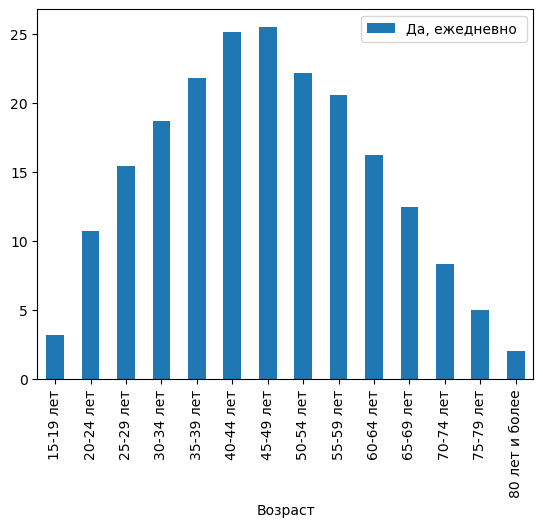

In [6]:
df_smoke.plot(x=0, y=1, kind = 'bar')
plt.show()

In [7]:
print_desc_stats(df_smoke['Да, ежедневно '].to_numpy())

Мат. ожидание - 14.785301604321075
Дисперсия - 59.42843484888312
Коэффицинт ассиметрии - -0.25408619999916066
Эксцесс - -1.2397900329010085
Квантиль 0,05 - 2.7701407238512363
Квантиль 0,95 - 25.220636622174972
2,5%-ная точка - 25.345828592931323


3.	Построить сравнительную диаграмму найденного распределения и распределения по нормальному закону с параметрами (*, **).

### Частота потребление энергетических напитков, содержащих кофеин по возрастным группам

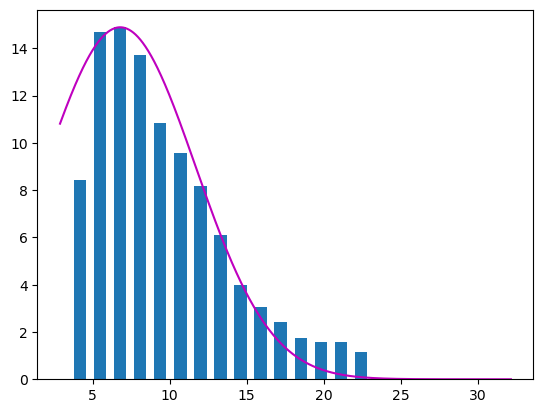

In [8]:
pl(df1['один раз в месяц или реже'].to_numpy())

### Курите ли вы в настоящее время

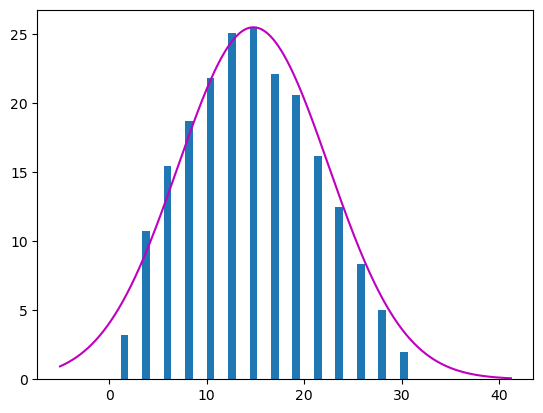

In [9]:
pl(df_smoke['Да, ежедневно '].to_numpy())